# Dynamic Pricing Strategy on Uber

 A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions. The company only uses ride duration to decide ride fares currently. The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model that can dynamically adjust prices in response to changing factors.

A dataset containing historical ride data has been provided. The dataset includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.

Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.

In [1]:
# importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/dynamic_pricing.csv')

In [3]:
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


# Exploratory Data Analysis

In [5]:
# looking for descriptive statistics
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


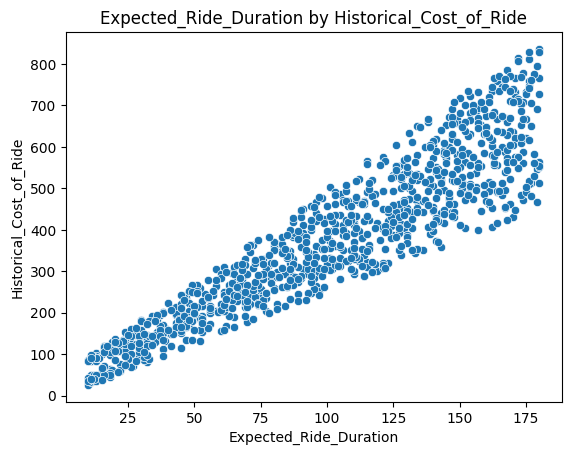

In [41]:
# distrubtion of Expected_Ride_Duration by Historical_Cost_of_Ride
sns.scatterplot(x='Expected_Ride_Duration' , y = 'Historical_Cost_of_Ride' , data = data)
plt.title('Expected_Ride_Duration by Historical_Cost_of_Ride')
plt.show()

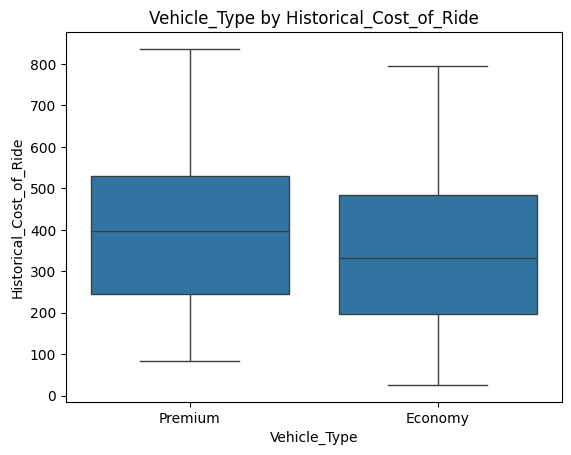

In [10]:
# distburtion of Vehicle_Type by Historical_Cost_of_Ride
sns.boxplot(x = 'Vehicle_Type' , y = 'Historical_Cost_of_Ride' ,data=data )
plt.title('Vehicle_Type by Historical_Cost_of_Ride')
plt.show()

In [12]:
# co-relation matrix
num = data.select_dtypes(include=['int' ,'float']).columns

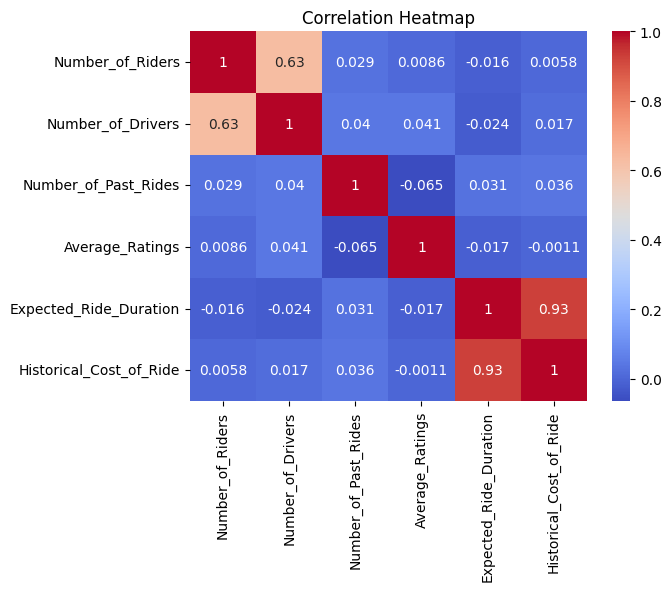

In [15]:
sns.heatmap(data[num].corr() , annot = True ,cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Implementing a Dynamic Pricing Strategy

In [16]:
# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

data['demand_multiplier'] = np.where(data['Number_of_Riders'] > np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], low_demand_percentile))


In [17]:
# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

data['supply_multiplier'] = np.where(data['Number_of_Drivers'] > np.percentile(data['Number_of_Drivers'], low_supply_percentile),
                                     data['Number_of_Drivers'] / np.percentile(data['Number_of_Drivers'], high_supply_percentile),
                                     data['Number_of_Drivers'] / np.percentile(data['Number_of_Drivers'], low_supply_percentile))


In [18]:
#Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

In [19]:
data['adjusted_ride_cost'] = data['Historical_Cost_of_Ride'] * (
    np.maximum(data['demand_multiplier'], demand_threshold_low) *
    np.maximum(data['supply_multiplier'], supply_threshold_high)
)

In [20]:
# Calculate the profit percentage for each ride
data['profit_percentage'] = ((data['adjusted_ride_cost'] - data['Historical_Cost_of_Ride']) / data['Historical_Cost_of_Ride']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = data[data['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = data[data['profit_percentage'] < 0]


In [21]:

import plotly.graph_objects as go

# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

# Create a donut chart to show the distribution of profitable and loss rides
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(title='Profitability of Rides (Dynamic Pricing vs. Historical Pricing)')
fig.show()

In [22]:
from sklearn.preprocessing import StandardScaler
def pre_processing_pipeline(data):
  numerical_columns = data.select_dtypes(include=['int' ,'float']).columns
  categorical_columns = data.seelct_dtypes(include=['objects']).columns

# handling the missing values in numerical column
  data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

#Detect and handle outliers in numeric features using IQR
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1
  lowerbound = Q1 - 1.5 * IQR
  upperbound = Q3 + 1.5 * IQR
  data[feature] = np.where((data[feature] < lowerbound) | (data[feature] > upperbound),
                           data[feature].mean(),
                           data[feature])

# handling the missing values in categorical column
  data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])
  return data


In [23]:
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost,profit_percentage
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1.111111,1.184211,374.022728,31.578947
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.450000,1.026316,258.753086,48.815789
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.050000,0.815789,282.495856,-14.342105
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1.098765,0.736842,413.312688,-12.098765
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,1.950000,0.578947,904.303019,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526,0.825000,0.605263,60.317087,-34.000000
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987,1.037037,0.763158,351.892374,-17.037037
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830,1.100000,0.545455,138.481051,-12.000000
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048,1.325000,0.710526,295.840751,6.000000


In [24]:
data["Vehicle_Type"] = data["Vehicle_Type"].map({"Premium": 1,
                                           "Economy": 0})

In [26]:
from sklearn.model_selection import train_test_split
X = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(data[['adjusted_ride_cost']])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Reshape y to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
def get_vehicle_type_numeric(vehicle_type):
  vehicle_type_mapping = {
        "Premium": 1,
        "Economy": 0
    }
  vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
  return vehicle_type_numeric

def predict_price(Number_of_Drivers , Number_of_Riders , Vehicle_Type , Expected_Ride_Duration):
  vehicle_type_numeric = get_vehicle_type_numeric(Vehicle_Type)
  if vehicle_type_numeric is None:
   raise ValueError("Invalid vehicle type")
  input_data = np.array([[Number_of_Drivers , Number_of_Riders , vehicle_type_numeric , Expected_Ride_Duration ]])
  predicted_price = model.predict(input_data)
  return predicted_price

# example inputs
Number_of_Drivers = 2
Number_of_Riders = 5
Vehicle_Type = "Premium"
Expected_Ride_Duration = 30

predicted_price = predict_price(Number_of_Drivers, Number_of_Riders, Vehicle_Type, Expected_Ride_Duration)
print("Predicted Price:", predicted_price)



Predicted Price: [101.50443854]


In [40]:
import plotly.graph_objects as go

# Predict on the test set
y_pred = model.predict(X_test)

# Create a scatter plot with actual vs predicted values
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.flatten(),
    y=y_pred,
    mode='markers',
    name='Actual vs Predicted'
))

# Add a line representing the ideal case
fig.add_trace(go.Scatter(
    x=[min(y_test.flatten()), max(y_test.flatten())],
    y=[min(y_test.flatten()), max(y_test.flatten())],
    mode='lines',
    name='Ideal',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=True,
)

fig.show()